https://github.com/karolzak/boxdetect/blob/master/notebooks/get-started-pipelines.ipynb

https://github.com/karolzak/boxdetect/blob/master/notebooks/get-started-autoconfig.ipynb

https://pypi.org/project/boxdetect/

possible alternatives:

https://github.com/mahima1997/Checkbox-Detection/blob/master/checkbox_detection.py

https://fuzzylabs.ai/blog/checkbox-detection/

https://github.com/fuzzylabs/jupyter-delicacies/blob/master/vision/object-detection.ipynb



In [5]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


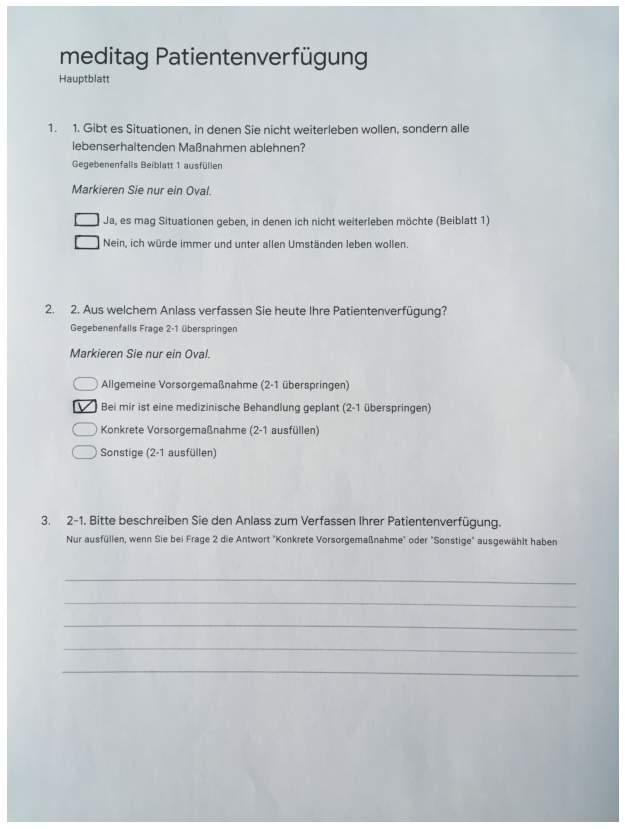

In [67]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

file_path = 'hauptblatt_1_blank_angular_checkbox.JPG'
# file_path = 'hauptblatt_1_blank.JPG'
# file_path = 'form_example1.png'

input_image = cv2.imread(file_path)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(input_image)
plt.show()

In [68]:
height, width = input_image.shape[:2]
print(height, width)

3264 2448


shape of image: 3264, 2448

sheet in mm: 296 / 209

checkbox in mm: 8 / 4.5

checkbox in pixel

8/296 * 3264 = 88.21 (=88)

4.5/296 * 3264 = 49.62 (=50)

In [69]:

from boxdetect import config

cfg = config.PipelinesConfig()

# important to adjust these values to match the size of boxes on your image
# cfg.width_range = (30, 50)
# cfg.height_range = (30, 35)
cfg.width_range = (75, 105)
cfg.height_range = (35, 65)

# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [1.0]

# w/h ratio range for boxes/rectangles filtering
# cfg.wh_ratio_range = (.45, .8)
cfg.wh_ratio_range = (0.5, 1.8)

# range of groups sizes to be returned
cfg.group_size_range = (1, 100)

# for this image we will use rectangles as a kernel for morphological transformations
cfg.morph_kernels_type = 'rectangles'  # 'lines'

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

In [70]:
from boxdetect.pipelines import get_boxes

rects, grouping_rects, image, output_image = get_boxes(
    file_path, cfg=cfg, plot=False)

Processing file:  hauptblatt_1_blank_angular_checkbox.JPG


In [71]:
grouping_rects

[(274, 830, 91, 51)]

In [72]:
rects

array([[274, 830,  90,  50]], dtype=int32)

Processing file:  hauptblatt_1_blank_angular_checkbox.JPG


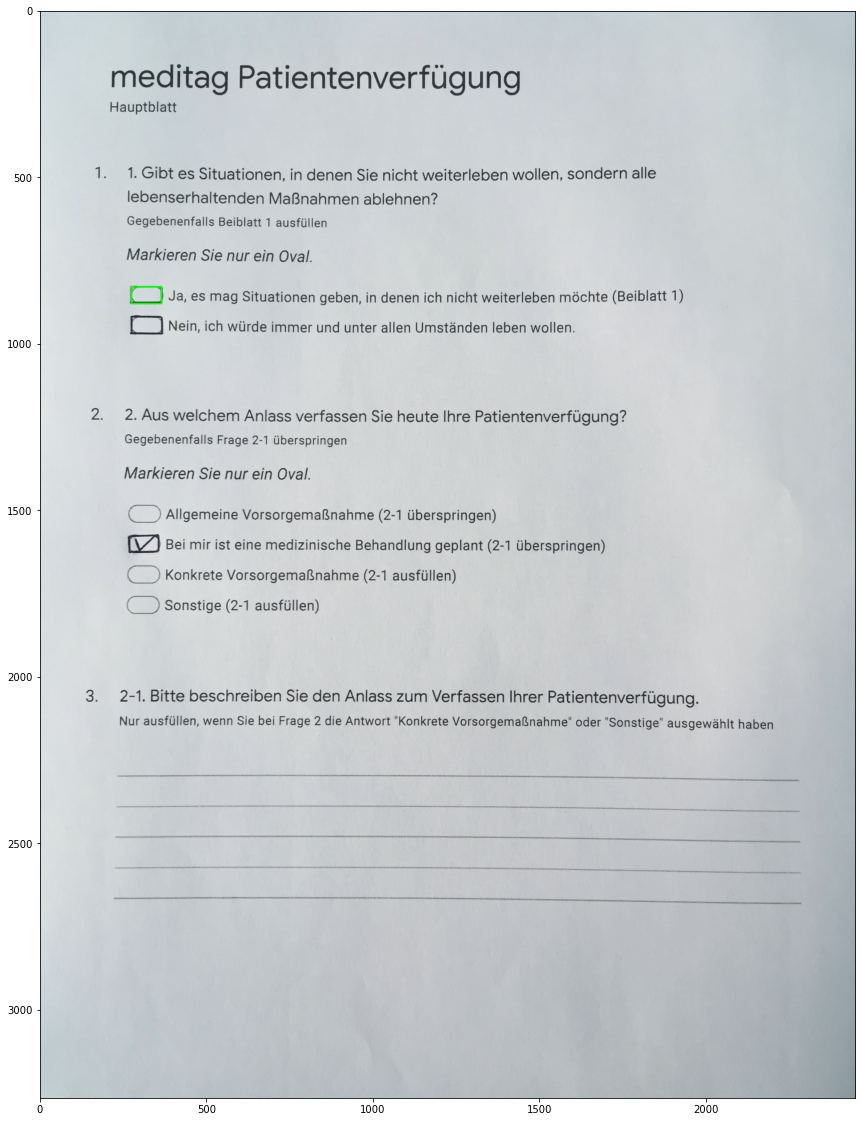

In [73]:
from boxdetect.img_proc import draw_rects, get_image
import matplotlib.pyplot as plt
%matplotlib inline

out_img = draw_rects(get_image(file_path), rects, thickness=3)

plt.figure(figsize=(15,20))
plt.imshow(out_img)
plt.show()